# Bike Share System Analysis
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are
geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to
any other station in the system anytim

**Note:** Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who
purchase annual memberships are Cyclistic membe?e.

In this notebook we will explore the dataset of Cyclistic bike Share to achieve the bussiness goal.

>**Bussiness Question:** How do annual members and casual riders use Cyclistic bikes differently?

In [1]:
#Load libraries 
library(tidyverse)
library(readr)
library(ggplot2)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
#Load libraries 
library(dplyr)
library(lubridate)

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union



## Import the dataset

> Using the trip data for three months of 2023 (September, October, November)

>> Read the datasets from CSV files.

In [3]:
data1 = read_csv("2023-09-divvy_trip_data.csv")
data2 = read_csv("2023-10-divvy_trip_data.csv")
data3 = read_csv("2023-11-divvy_trip_data.csv")


-- Column specification --------------------------------------------------------
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)


-- Column specification --------------------------------------------------------
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
 

>> Ccombine the datasets together by the 'binds_rows' function from the 'dplyr' library

In [4]:
data = bind_rows(data1, data2, data3)

In [5]:
head(data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
011C1903BF4E2E28,classic_bike,2023-09-23 00:27:50,2023-09-23 00:33:27,Halsted St & Wrightwood Ave,TA1309000061,Sheffield Ave & Wellington Ave,TA1307000052,41.92914,-87.64908,41.93625,-87.65266,member
87DB80E048A1BF9F,classic_bike,2023-09-02 09:26:43,2023-09-02 09:38:19,Clark St & Drummond Pl,TA1307000142,Racine Ave & Fullerton Ave,TA1306000026,41.93125,-87.64434,41.92557,-87.65842,member
7C2EB7AF669066E3,electric_bike,2023-09-25 18:30:11,2023-09-25 18:41:39,Financial Pl & Ida B Wells Dr,SL-010,Racine Ave & 15th St,13304,41.87506,-87.63314,41.86127,-87.65663,member
57D197B010269CE3,classic_bike,2023-09-13 15:30:49,2023-09-13 15:39:18,Clark St & Drummond Pl,TA1307000142,Racine Ave & Belmont Ave,TA1308000019,41.93125,-87.64434,41.93974,-87.65887,member
8A2CEA7C8C8074D8,classic_bike,2023-09-18 15:58:58,2023-09-18 16:05:04,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Fullerton Ave,TA1306000026,41.92914,-87.64908,41.92557,-87.65842,member
03F7044D1304CD58,electric_bike,2023-09-15 20:19:25,2023-09-15 20:30:27,Southport Ave & Wrightwood Ave,TA1307000113,NA,NA,41.92884,-87.66387,41.90000,-87.64000,member


In [6]:
str(data)

spec_tbl_df[,13] [1,566,002 x 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:1566002] "011C1903BF4E2E28" "87DB80E048A1BF9F" "7C2EB7AF669066E3" "57D197B010269CE3" ...
 $ rideable_type     : chr [1:1566002] "classic_bike" "classic_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:1566002], format: "2023-09-23 00:27:50" "2023-09-02 09:26:43" ...
 $ ended_at          : POSIXct[1:1566002], format: "2023-09-23 00:33:27" "2023-09-02 09:38:19" ...
 $ start_station_name: chr [1:1566002] "Halsted St & Wrightwood Ave" "Clark St & Drummond Pl" "Financial Pl & Ida B Wells Dr" "Clark St & Drummond Pl" ...
 $ start_station_id  : chr [1:1566002] "TA1309000061" "TA1307000142" "SL-010" "TA1307000142" ...
 $ end_station_name  : chr [1:1566002] "Sheffield Ave & Wellington Ave" "Racine Ave & Fullerton Ave" "Racine Ave & 15th St" "Racine Ave & Belmont Ave" ...
 $ end_station_id    : chr [1:1566002] "TA1307000052" "TA1306000026" "13304" "TA1308000019" ...
 $

In [7]:
is_na<- colSums(is.na(data))
is_na

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            240727             240727             254443             254443 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               1780               1780 
     member_casual 
                 0

# **Data Cleaning**

>Add Trip Duration colmun to the dataset

In [8]:
# claculate the trip_duration columns by 
# subtract the started_at column from the ended_at columns
# And divide it by 60 to be with  minute

data<- data%>%
    mutate(data, trip_duration = as.numeric((ended_at - started_at)/ 60))

>Add Day of Week Column to the dataset

In [9]:
data$day_of_week <- weekdays(data$started_at)

In [10]:
head(data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week
011C1903BF4E2E28,classic_bike,2023-09-23 00:27:50,2023-09-23 00:33:27,Halsted St & Wrightwood Ave,TA1309000061,Sheffield Ave & Wellington Ave,TA1307000052,41.92914,-87.64908,41.93625,-87.65266,member,5.616667,Saturday
87DB80E048A1BF9F,classic_bike,2023-09-02 09:26:43,2023-09-02 09:38:19,Clark St & Drummond Pl,TA1307000142,Racine Ave & Fullerton Ave,TA1306000026,41.93125,-87.64434,41.92557,-87.65842,member,11.600000,Saturday
7C2EB7AF669066E3,electric_bike,2023-09-25 18:30:11,2023-09-25 18:41:39,Financial Pl & Ida B Wells Dr,SL-010,Racine Ave & 15th St,13304,41.87506,-87.63314,41.86127,-87.65663,member,11.466667,Monday
57D197B010269CE3,classic_bike,2023-09-13 15:30:49,2023-09-13 15:39:18,Clark St & Drummond Pl,TA1307000142,Racine Ave & Belmont Ave,TA1308000019,41.93125,-87.64434,41.93974,-87.65887,member,8.483333,Wednesday
8A2CEA7C8C8074D8,classic_bike,2023-09-18 15:58:58,2023-09-18 16:05:04,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Fullerton Ave,TA1306000026,41.92914,-87.64908,41.92557,-87.65842,member,6.100000,Monday
03F7044D1304CD58,electric_bike,2023-09-15 20:19:25,2023-09-15 20:30:27,Southport Ave & Wrightwood Ave,TA1307000113,NA,NA,41.92884,-87.66387,41.90000,-87.64000,member,11.033333,Friday


In [11]:
summary(data)

   ride_id          rideable_type        started_at                 
 Length:1566002     Length:1566002     Min.   :2023-09-01 00:00:44  
 Class :character   Class :character   1st Qu.:2023-09-18 15:49:23  
 Mode  :character   Mode  :character   Median :2023-10-05 20:44:30  
                                       Mean   :2023-10-09 15:28:18  
                                       3rd Qu.:2023-10-28 23:14:40  
                                       Max.   :2023-11-30 23:59:14  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2023-09-01 00:03:06   Length:1566002     Length:1566002    
 1st Qu.:2023-09-18 16:04:02   Class :character   Class :character  
 Median :2023-10-05 20:57:58   Mode  :character   Mode  :character  
 Mean   :2023-10-09 15:44:25                                        
 3rd Qu.:2023-10-28 23:32:29                                        
 Max.   :2023-12-01 20:42:31      

> Show statistics INFO about the trip duration column

In [12]:
min(data$trip_duration)
mean(data$trip_duration)
max(data$trip_duration)

[1] -16656.52

[1] 16.12913

[1] 1507.767

>Fixing the minimum time in the trip duration column by ensure that the started time is less than the ended time 

In [13]:
data <- data%>%
    filter(started_at < ended_at)

In [14]:
min(data$trip_duration)

[1] 0.01666667

>>The trip duration equal 1 sec!, Is this impossible?

>>I will filter the dataset again and just include trip duration that equal at least 10 second.

In [15]:
data <- data%>%
    filter(trip_duration >= 0.16)

# **Data Visualization using ggplot2**

>First calculate basic descriptive statistics of trip duration for both annual members and casual riders

.

In [16]:
# Member User
data%>%
    filter(member_casual == "member")%>%
    summarise(AVG = mean(trip_duration), Maximum = max(trip_duration), Minimum = min(trip_duration))

AVG,Maximum,Minimum
12.45229,1499.95,0.1666667


.

.

In [17]:
# Casual User
data%>%
    filter(member_casual == "casual")%>%
    summarise(AVG = mean(trip_duration), Maximum = max(trip_duration), Minimum = min(trip_duration))

AVG,Maximum,Minimum
23.5518,1507.767,0.1666667


.

.

>Show Numbers of User Type

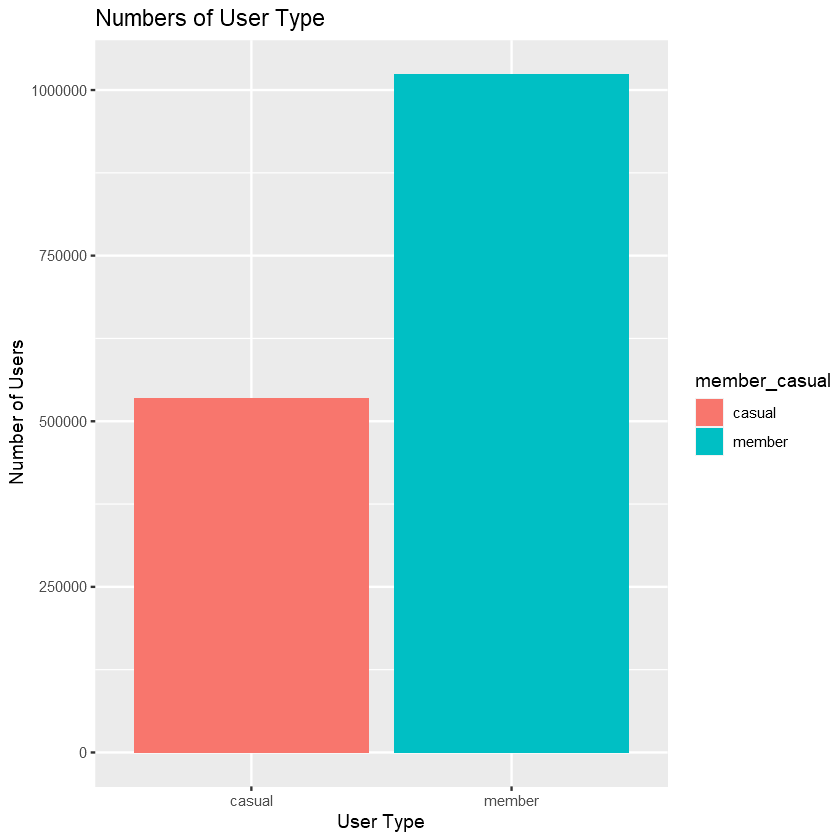

In [18]:
ggplot(data, aes(x= member_casual, fill = member_casual))+
    geom_bar()+
    labs(title = "Numbers of User Type", x= "User Type", y = "Number of Users");

.

.

>Explore how the number of rides varies by day of the week

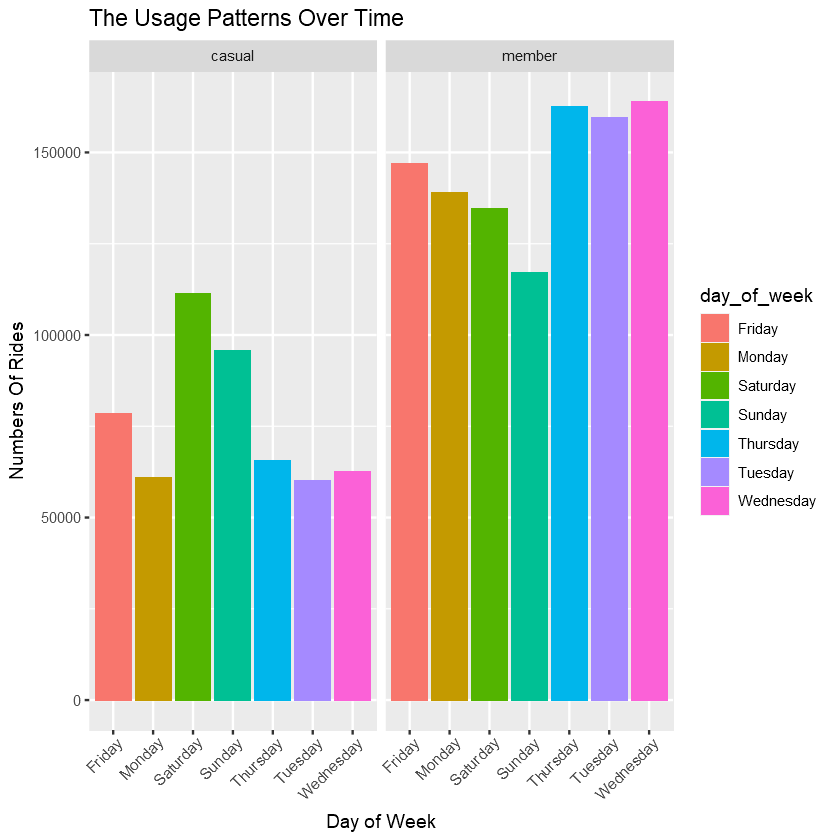

In [19]:
ggplot(data, aes(x=day_of_week , fill = day_of_week))+
    geom_bar()+
    facet_wrap(~member_casual)+
    labs(title = "The Usage Patterns Over Time", x= "Day of Week", y = "Numbers Of Rides")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

.

.

>Plot the average trip duration over time for both user types.

NULL

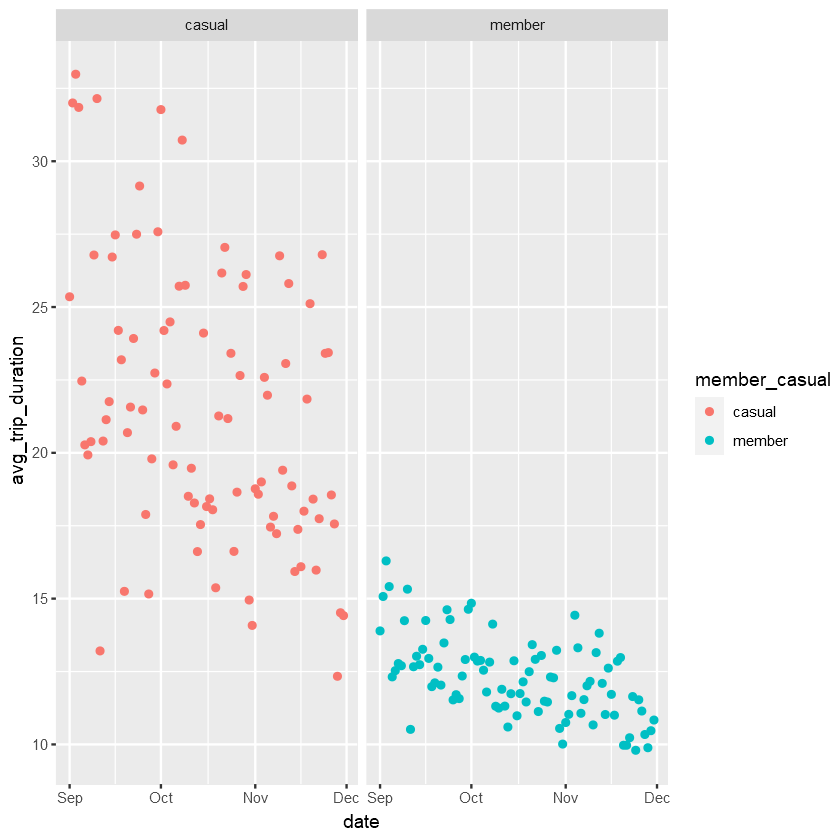

In [20]:
library(dplyr)
df_grouped <- data %>%
  group_by(member_casual, date = as.Date(started_at)) %>%
  summarise(avg_trip_duration = mean(trip_duration, na.rm = TRUE), .groups = "drop")


ggplot(df_grouped, aes(x = date, y = avg_trip_duration, color = member_casual)) +
    geom_point() +
    facet_wrap(~member_casual)
    labs(title = "Average Trip Duration Over Time",
         x = "Date",
         y = "Average Trip Duration (minutes)",
         color = "User Type") +
    theme_minimal()

.

.

>Explore the rideable type preferences for annual members and casual riders

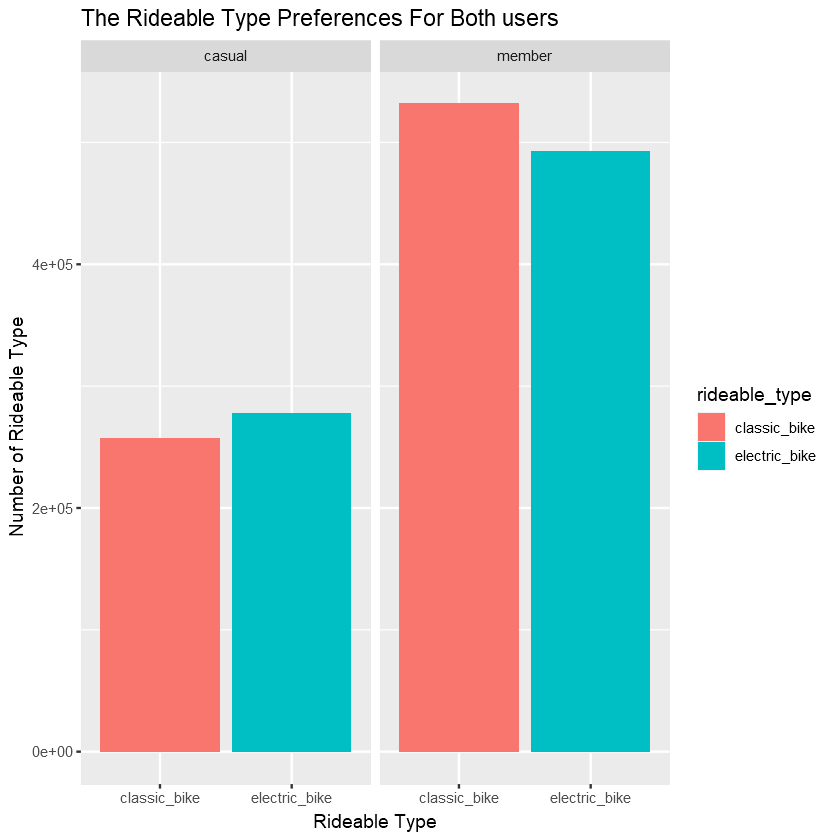

In [21]:
ggplot(data, aes(x = rideable_type, fill = rideable_type))+
    geom_bar()+
    facet_wrap(~member_casual)+
    labs(title = "The Rideable Type Preferences For Both users", y = "Number of Rideable Type", x = "Rideable Type")


.

.

# **Conclusion**

> **Over the last three months, the number of annual members consistently exceeded that of casual riders, indicating a higher level of engagement among the membership base.**

> **The most popular days for casual riders are the weekends, particularly Saturday and Sunday, whereas annual members tend to utilize the service more frequently on weekdays, with Tuesday, Thursday, and Wednesday being the most active days.**


> **Average trip durations differ significantly between casual riders and annual members, with casual riders generally having longer trip durations compared to members.**

> **Preferences for bike types vary between the two user groups. Casual riders show a preference for electric bikes, while annual members favor classic bikes.**